### Libraries

In [1]:
import geopandas as gpd
from geopandas.tools import overlay
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/tmp/ipykernel_5086/3924256960.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For

### GeoDataFrame Object of 'Espacios Públicos en CDMX'

In [2]:
schema = 'espacios_publicos'
table = 'ep_cdmx'
gdf = aup.gdf_from_db(table,schema)
gdf.head()

,id,geo_point_2d,geo_shape,subcat_sed,subcve_sed,gid,cve_delg,delegacion,categoria,superficie,perimetro,cve_sedema,geometry
0,0,"19.4877568178,-99.2060645931","{'type': 'MultiPolygon', 'coordinates': [[[[-9...",Panteones,604,268,2,Azcapotzalco,Equipamientos urbanos con vegetación,6660.027554,329.264738,600,"POLYGON ((-99.20639 19.48819, -99.20556 19.487..."
1,1,"19.3887689803,-99.116393168","{'type': 'MultiPolygon', 'coordinates': [[[[-9...",Deportivos,601,87,8,Iztacalco,Equipamientos urbanos con vegetación,2917.257837,272.2436142,600,"POLYGON ((-99.11679 19.38904, -99.11637 19.388..."
2,2,"19.3928871121,-99.0869912505","{'type': 'MultiPolygon', 'coordinates': [[[[-9...",Camellones centrales y laterales,203,180,8,Iztacalco,Áreas verdes complementarias o ligadas a la re...,1086.305646,425.0436555,200,"POLYGON ((-99.08651 19.39367, -99.08648 19.393..."
3,3,"19.383106069,-99.1073609486","{'type': 'MultiPolygon', 'coordinates': [[[[-9...",Unidades habitacionales,602,89,8,Iztacalco,Equipamientos urbanos con vegetación,3605.704046,269.2094365,600,"POLYGON ((-99.10780 19.38333, -99.10688 19.383..."
4,4,"19.3822134465,-99.1028423436","{'type': 'MultiPolygon', 'coordinates': [[[[-9...",Unidades habitacionales,602,90,8,Iztacalco,Equipamientos urbanos con vegetación,19619.36158,798.4092267,600,"POLYGON ((-99.10389 19.38315, -99.10355 19.383..."


In [3]:
gdf.shape

(11609, 13)

In [4]:
gdf['subcat_sed'].unique()

array(['Panteones', 'Deportivos', 'Camellones centrales y laterales',
       'Unidades habitacionales', 'Instituciones académicas públicas',
       'Plazas', 'Asistencia Social con vegetación CDMX', 'Parques',
       'Veg. Arbórea, arbustiva y herbácea de glorietas', 'Vialidades',
       'Instituciones académicas privadas', 'Arboledas',
       'Instituciones de salud pub/priv', 'Jardines públicos', 'Canales',
       'Jardineras públicas y privadas', 'Azoteas verdes', 'Bordos',
       'Terrenos baldíos', 'AVA', 'Depresiones orográficas', 'ANP',
       'Alamedas', 'Promontorios', 'Colinas', 'Cerros',
       'Zona de recarga de manto acuíferos'], dtype=object)

### Plot'Espacios Públicos'

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:649: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


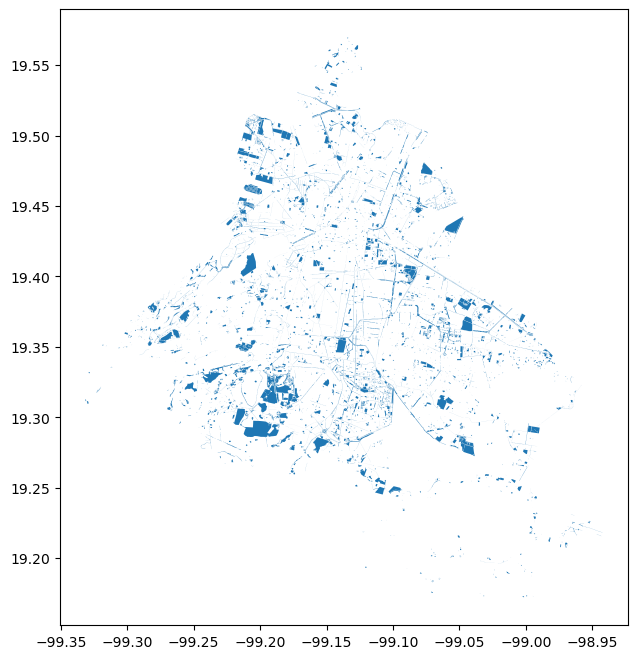

In [5]:
#gdf.plot()
f, axx = plt.subplots(1, figsize=(8, 8))
axx = gdf.plot(axes=axx, alpha=1)
#gdf.xlim(-103.8, -102.8)
#gdf.ylim(20.3, 21)
plt.show()
#trabajar con resolución 11
#city: gdl

### GeoDataFrame Object of 'CDMX' in Hexagons

In [17]:
hex_schema = "hexgrid"
hex_table = "hexgrid_8_city"
c = 'ZMVM'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"metropolis\" LIKE \'{c}\''
hex_cdmx = aup.gdf_from_query(query, geometry_col='geometry')
hex_cdmx

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,ZMVM
1,"POLYGON ((-99.15333 19.47646, -99.15369 19.481...",884995b817fffff,09002,ZMVM
2,"POLYGON ((-99.17559 19.45667, -99.17107 19.459...",884995baa5fffff,09002,ZMVM
3,"POLYGON ((-99.14917 19.48454, -99.15369 19.481...",884995b83bfffff,09002,ZMVM
4,"POLYGON ((-99.16726 19.47282, -99.16274 19.475...",884995b813fffff,09002,ZMVM
...,...,...,...,...
9023,"POLYGON ((-99.05470 19.69090, -99.05958 19.693...",884995a9a5fffff,15125,ZMVM
9024,"POLYGON ((-99.06198 19.65930, -99.05744 19.662...",884995a9e5fffff,15125,ZMVM
9025,"POLYGON ((-99.04945 19.68353, -99.05434 19.685...",88499506d3fffff,15125,ZMVM
9026,"POLYGON ((-99.05994 19.69828, -99.06483 19.700...",884995a9a7fffff,15125,ZMVM


Solo Distrito Federal

In [27]:
selected_values = ['09002', '09003', '09004', '09005', '09006', '09007', '09008', '09009', '09010', '09011', '09012', '09013', '09014', '09015', '09016', '09017']
hex_cdmx = hex_cdmx[hex_cdmx['CVEGEO'].isin(selected_values)]
hex_cdmx['CVEGEO'].unique()

array(['09002', '09003', '09004', '09005', '09006', '09007', '09008',
       '09009', '09010', '09011', '09012', '09013', '09014', '09015',
       '09016', '09017'], dtype=object)

### Plot 'Hexagons-CDMX'

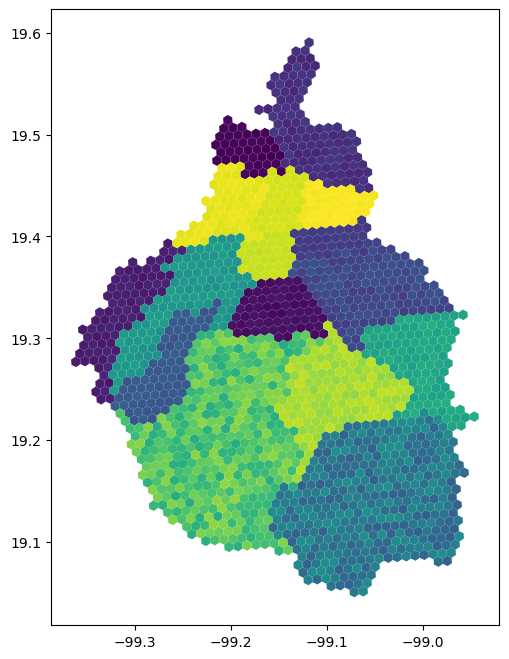

In [24]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = hex_cdmx.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

In [21]:
import leafmap

### Intersección Espacial

In [25]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Espacios públicos", zoom_to_layer=True)
m.add_gdf(hex_cdmx, layer_name="Hexagonos")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [12]:
#Segundo paso: Ver variables dependientes para el modelo de predicción